<a href="https://colab.research.google.com/github/elaefry/TubesTKC/blob/main/histogram/ISIC_hi_histogram_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
from skimage import exposure
import matplotlib.pyplot as plt
import argparse
import cv2

In [ ]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "source": "ISIC_0000013.jpg",
    "reference": "ISIC_0000022.jpg"
}

[INFO] loading source and reference images...
[INFO] performing histogram matching...


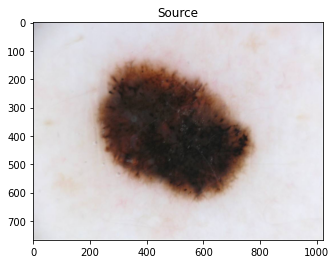

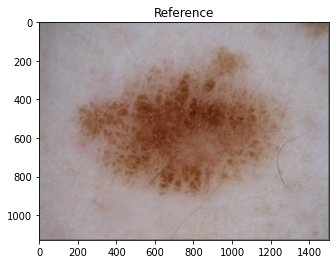

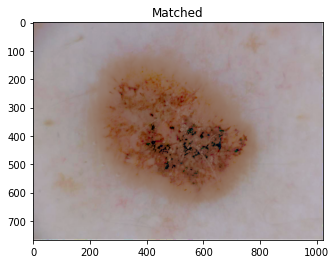

In [ ]:
# load the source and reference images
print("[INFO] loading source and reference images...")
src = cv2.imread(args["source"])
ref = cv2.imread(args["reference"])

# determine if we are performing multichannel histogram matching
# and then perform histogram matching itself
print("[INFO] performing histogram matching...")
multi = True if src.shape[-1] > 1 else False
matched = exposure.match_histograms(src, ref, multichannel=multi)

# show the output images
plt_imshow("Source", src)
plt_imshow("Reference", ref)
plt_imshow("Matched", matched)

Text(0.5, 1.0, 'Matched')

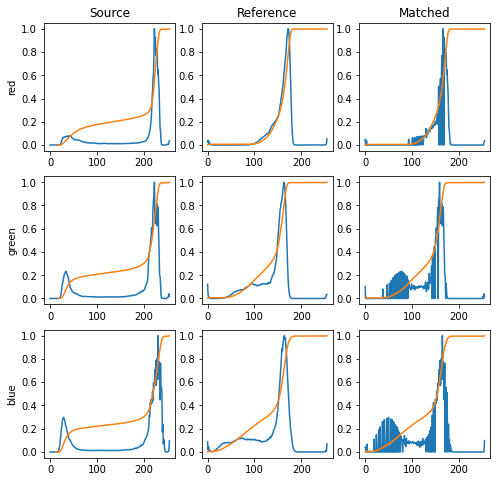

In [ ]:
# construct a figure to display the histogram plots for each channel
# before and after histogram matching was applied
(fig, axs) =  plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

# loop over our source image, reference image, and output matched
# image
for (i, image) in enumerate((src, ref, matched)):
	# convert the image from BGR to RGB channel ordering
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

	# loop over the names of the channels in RGB order
	for (j, color) in enumerate(("red", "green", "blue")):
		# compute a histogram for the current channel and plot it
		(hist, bins) = exposure.histogram(image[..., j],
			source_range="dtype")
		axs[j, i].plot(bins, hist / hist.max())

		# compute the cumulative distribution function for the
		# current channel and plot it
		(cdf, bins) = exposure.cumulative_distribution(image[..., j])
		axs[j, i].plot(bins, cdf)

		# set the y-axis label of the current plot to be the name
		# of the current color channel
		axs[j, 0].set_ylabel(color)
  
# set the axes titles
axs[0, 0].set_title("Source")
axs[0, 1].set_title("Reference")
axs[0, 2].set_title("Matched")